# **MNIST Classification using Multilayer Perceptron**

This script demonstrates how to perform classification on the MNIST dataset using a Multilayer Perceptron (MLP) with Scikit-learn. The MNIST dataset consists of 28x28 pixel images of handwritten digits

# Import Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

**fetch_openml:** Fetches datasets from the OpenML repository.

**MLPClassifier:** Implements the Multilayer Perceptron algorithm.

# Load Dataset

**fetch_openml('mnist_784', version=1):** Loads the MNIST dataset from OpenML.

**X:** Features (pixel values of images).

**y:**Target labels (digit classes).

In [11]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target
print('X:')
print(X)
print('y:')
print(y)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X:
       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pix

# Split the dataset into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**train_test_split:** Splits the dataset into training and testing subsets. Here, 20% of the data is used for testing.

# Create MLP classifier

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, alpha=0.001, random_state=42)

**MLPClassifier:** Initializes the MLP model with 128 and 64 neurons in the first and second hidden layers, respectively.

**max_iter:** Controls the maximum number of training iterations. Setting it too low may lead to insufficient training, while setting it too high may increase computational cost.

**alpha:** Adjusts the strength of regularization to prevent overfitting. A small value means less regularization, while a larger value means more regularization.

**random_state:** Ensures reproducibility by fixing the seed for the random number generator. This allows consistent results across different runs.



# Model training

In [14]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(128, 64), max_iter=20,
              random_state=42)

# Prediction, classification report and accuracy

In [16]:
y_pred = mlp.predict(X_test)

In [17]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.96      0.94      0.95      1380
           3       0.98      0.91      0.94      1433
           4       0.93      0.97      0.95      1295
           5       0.93      0.95      0.94      1273
           6       0.98      0.96      0.97      1396
           7       0.98      0.94      0.96      1503
           8       0.91      0.96      0.93      1357
           9       0.91      0.95      0.93      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

Accuracy Score: 0.9536428571428571


predict(X_test): Generates predictions for the test set.

classification_report: Provides detailed performance metrics (precision, recall, f1-score).

accuracy_score: Calculates the accuracy of the model.

# Visualization

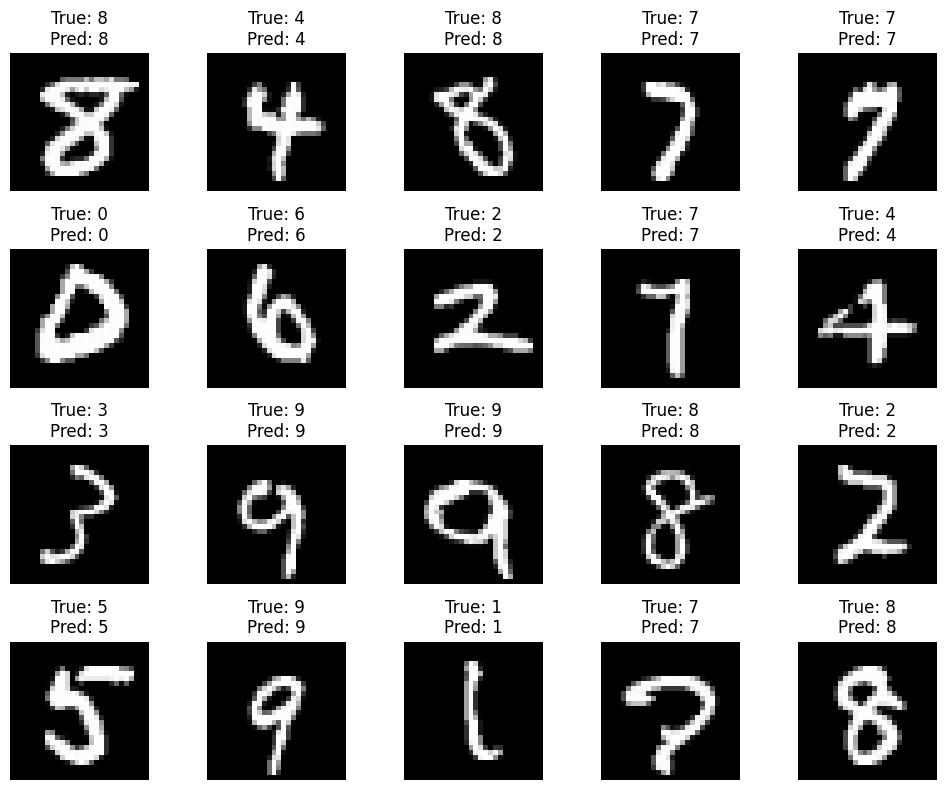

In [18]:
def plot_images(images, labels, predictions, num_cols=5):
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 2 * num_rows))
    for i in range(num_images):
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {labels[i]}\nPred: {predictions[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Convert to NumPy arrays if they are not already
if isinstance(y_test, pd.Series):
    y_test = y_test.values
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.values

# Plot some test images with predictions
num_images_to_plot = 20
plot_images(X_test[:num_images_to_plot].to_numpy(), y_test[:num_images_to_plot], y_pred[:num_images_to_plot])

plot_images: Function to visualize a grid of images with their true and predicted labels.

The num_cols parameter defines the number of columns in the grid.